In [1]:
import os
import cv2
import urllib
import numpy as np
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.layers import *
from lib.activations import *
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical
from lib.optimizers import *
from lib.model import *
from lib.dataset import ImageClassificationDataset

In [2]:
dataset = ImageClassificationDataset()
dataset.load("/home/deni/Cloud/Laptop/Projects/Python/cnn_from_scratch/dataset2", size=28)
dataset.augment()
dataset.balance()
dataset.preprocess(
     white_balance = False
)
dataset.shuffle()
dataset.normalize()
dataset.reshape()

X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split()

Train batch contains 4_578 images
Validation batch contains 1_308 images
Test batch contains 654 images


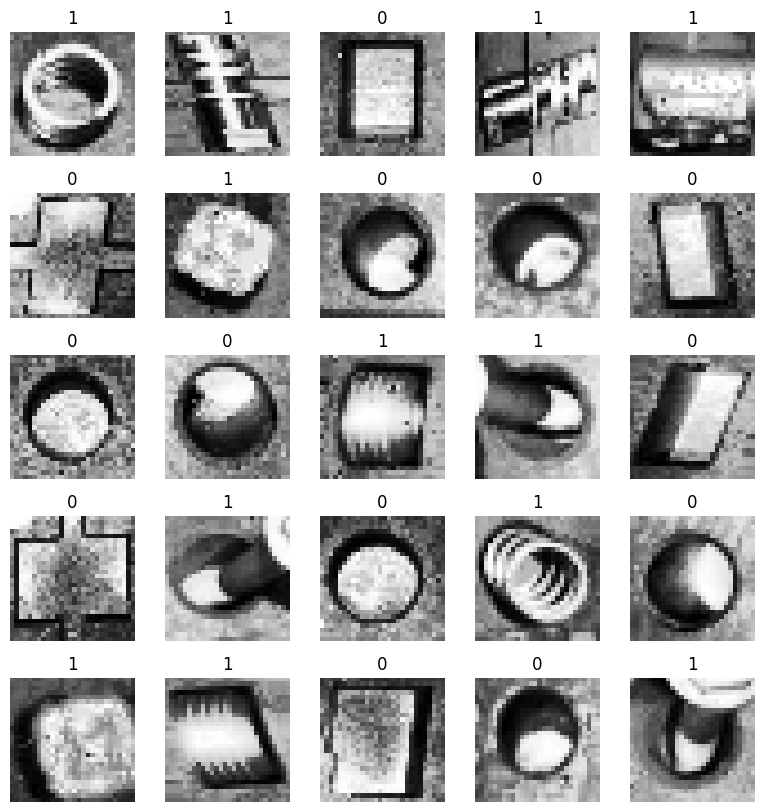

In [3]:
dataset.preview()

INNEN

In [6]:
y_train = y_train.reshape(-1, 1) # Now classes are binary
y_valid = y_valid.reshape(-1, 1) # Now classes are binary
y_test = y_test.reshape(-1, 1) # Now classes are binary

In [29]:
model = Model()
# Add layers
model.add(Layer_Dense(X_train.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 1))
model.add(Activation_Sigmoid())

model.set(
    loss=Loss_BinaryCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.0001, decay=0.005),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid),
    epochs=10, 
    batch_size=128, 
    print_every=100
)

epoch: 1
    step: 0, acc: 0.219, loss: 1.134 (data_loss: 1.134,reg_loss: 0.000), lr: 0.0001
    step: 35, acc: 0.531, loss: 0.716 (data_loss: 0.716,reg_loss: 0.000), lr: 8.510638297872341e-05
training, acc: 61.199, loss: 0.865 (data_loss: 0.865, reg_loss: 0.000), lr: 8.510638297872341e-05
validation, acc: 70.064,loss: 0.539

epoch: 2
    step: 0, acc: 0.570, loss: 0.646 (data_loss: 0.646,reg_loss: 0.000), lr: 8.474576271186441e-05
    step: 35, acc: 0.602, loss: 0.581 (data_loss: 0.581,reg_loss: 0.000), lr: 7.380073800738008e-05
training, acc: 63.334, loss: 0.643 (data_loss: 0.643, reg_loss: 0.000), lr: 7.380073800738008e-05
validation, acc: 67.150,loss: 0.440

epoch: 3
    step: 0, acc: 0.586, loss: 0.568 (data_loss: 0.568,reg_loss: 0.000), lr: 7.352941176470589e-05
    step: 35, acc: 0.541, loss: 0.423 (data_loss: 0.423,reg_loss: 0.000), lr: 6.514657980456026e-05
training, acc: 63.093, loss: 0.538 (data_loss: 0.538, reg_loss: 0.000), lr: 6.514657980456026e-05
validation, acc: 64.073

In [ ]:
model.evaluate(X_test, y_test) # Use test set

In [26]:
model.save("model.m")
model = Model.load("model.m")

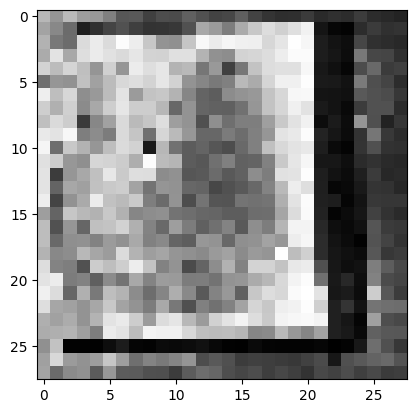

Prediction: [0], True: [0]
T-shirt/top


In [28]:
fashion_mnist_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

img = 5

plt.imshow((X_test[img].reshape(28, 28)), cmap='gray')
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction[0]])